# Title

### Abstract:
Here is the abstract

### Introduction and theoretical overview:
Here is the stuff

### Experimental Setup and Procedures:
Sick pics go here.

### Experimental Data and Error Analysis:
Cute plots, good math.

### 2.3
Time averaged total noise for 3 seconds for 1 OHM resistor = .18 V

Time averaged total noise for 3 seconds 100 kOHM resistor= 4.79 V

T = 23.4 +- .1

To measure amplifier noise, we set resistance to 1 Ohm and 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from scipy.interpolate import UnivariateSpline, interp1d

## Johnson Noise Dependence on Resistance, Bandwidth, & Temperature

In [39]:
johnson_df_gain = (500.0 * 600.0)**2
amp_noise = .018 * 10.0
amp_gain = 300.0**2.0
gain = (300.0 * 600.0)**2.0

# =======================================================================
# ------------------------Data and Calculations--------------------------
# =======================================================================

data_johnson_R = np.zeros(6, dtype=[('R_in', float, 1),
                                    ('V_avg', float, 1),
                                    ('V_avg_e', float, 1)])
data_johnson_R['R_in'] = np.array([1e1, 1e2, 1e3, 1e4, 1e5, 1e6])
data_johnson_R['V_avg'] = np.array([.01867, .01923, .02470, .0799, .480, .910]) * 10.0
data_johnson_R['V_avg_e'] = np.array([.00003, .00003, .0002, .001, .001, .001]) * 10.0

data_johnson_df = np.zeros(11, dtype=[('df', float, 1),
                                     ('amp_noise', float, 1),
                                     ('amp_noise_e', float, 1),
                                     ('V_avg', float, 1),
                                     ('V_avg_e',   float, 1)])
data_johnson_df['df'] = np.array([11096, 111061, 11074, 36620, 3554, 36543,
                                  10774, 110739, 2576, 35543, 7839])
data_johnson_df['amp_noise'] = np.array([.00211, .0585, .00209, .0164, 0, .0163,
                                         .00185, .0585, 0, .001584, 0])
data_johnson_df['amp_noise_e'] = np.array([.00002, .0001, .00001, .0001, 0, .0001,
                                           .00001, .0001, 0, .000001, 0])
data_johnson_df['V_avg'] = np.array([.0185, .2289, .0185, .0717, .0032, .0716,
                                     .0178, .2284, .00124, .06969, .01169])
data_johnson_df['V_avg_e'] = np.array([.00001, .0001, .0001, .0001, .0001, .0001,
                                       .0001, .0001, .00001, .0001, .00001])

def johnson_Res(V_avg):
    df = 110961
    T = 23.4 
    k_b = 1.38064852e-29
    Vj_avg = 10.0 / gain * (V_avg - amp_noise)
    return Vj_avg

def johnson_df(V_avg, amp_noise):
    df = 110961
    T = 23.4
    k_b = 1.38064852e-29
    Vj_avg = 10.0 / gain * (V_avg - amp_noise)
    return Vj_avg

johnson_R = johnson_Res(data_johnson_R['V_avg'])
johnson_R_err = johnson_Res(data_johnson_R['V_avg_e'])

In [4]:
data_johnson_R = pd.DataFrame(data_johnson_R)
data_johnson_df = pd.DataFrame(data_johnson_df)
data_johnson_R

fit_data_johnson_R = np.polyfit(data_johnson_R['R_in'], johnson_R, 1)
fit_data_johnson_R = np.poly1d(fit_data_johnson_R)
fit_data_johnson_R_x = np.linspace(min(data_johnson_R['R_in']), max(data_johnson_R['R_in']), 10000)

In [60]:
pd.DataFrame(data_johnson_R)

,R_in,V_avg,V_avg_e
0,10.0,0.1867,0.0003
1,100.0,0.1923,0.0003
2,1000.0,0.2470,0.0020
3,10000.0,0.7990,0.0100
4,100000.0,4.8000,0.0100
5,1000000.0,9.1000,0.0100


In [61]:
pd.DataFrame(data_johnson_df)

,df,amp_noise,amp_noise_e,V_avg,V_avg_e
0,11096.0,0.002110,0.000020,0.01850,0.00001
1,111061.0,0.058500,0.000100,0.22890,0.00010
2,11074.0,0.002090,0.000010,0.01850,0.00010
3,36620.0,0.016400,0.000100,0.07170,0.00010
4,3554.0,0.000000,0.000000,0.00320,0.00010
5,36543.0,0.016300,0.000100,0.07160,0.00010
6,10774.0,0.001850,0.000010,0.01780,0.00010
7,110739.0,0.058500,0.000100,0.22840,0.00010
8,2576.0,0.000000,0.000000,0.00124,0.00001
9,35543.0,0.001584,0.000001,0.06969,0.00010


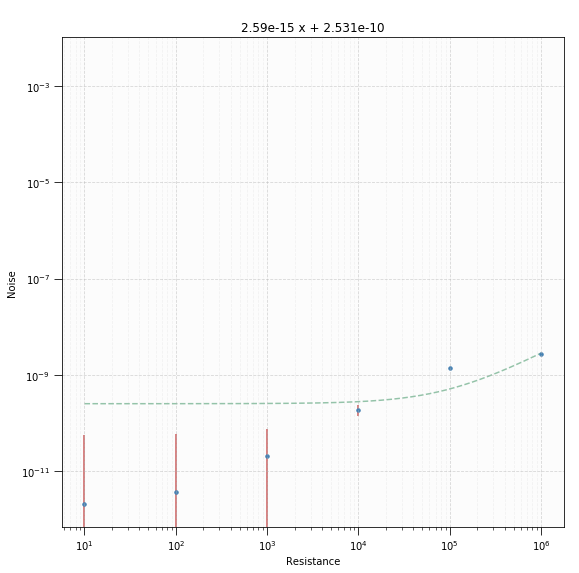

In [40]:
height_ratios = [9]
width_ratios = [9]
wspace = 0
hspace = 0
fig = plt.figure(figsize=(sum(width_ratios) + wspace *
                          (len(width_ratios) - 1),
                          sum(height_ratios) + hspace *
                          (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios),
                       len(width_ratios),
                       height_ratios=height_ratios,
                       width_ratios=width_ratios)
fig.suptitle('', fontsize=20)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(data_johnson_R['R_in'], johnson_R,
            marker='o', s=12, c = 'steelblue')
ax.plot(fit_data_johnson_R_x, fit_data_johnson_R(fit_data_johnson_R_x),
        '--', c='seagreen', alpha = .5, zorder=0)
ax.errorbar(data_johnson_R['R_in'], johnson_R,
            yerr=johnson_R_err, fmt=',',
            c='indianred', label='Error', zorder=0)
ax.update({'title': '{}'.format(fit_data_johnson_R),
            'xlabel': 'Resistance',
            'ylabel': 'Noise'})
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_facecolor('whitesmoke')
ax.patch.set_alpha(.25)
ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
# ax.set_ylim((min(data_johnson_df_noise)*.9,
#              max(data_johnson_df_noise)*1.1))
#ax.set_xlim((min(verdet_right)-.00002, max(verdet_right)*1.1))
plt.show()

$k_{b} = \frac{c}{4T\Delta f}$

$k_{b} = \frac{2.59e-15}{(4.0)(296.4)(110961)}$

In [23]:
kb_obs = 2.59e-15/(4.*296.4*110961)
kb_true = 1.38064852e-23
print 'Observed Boltzman Constant = {}'.format(kb_obs)
print 'Real Boltzman Constant = 1.38064852e−23'
print 'Percent Error = {:.2f}%'.format(abs(kb_true-kb_obs)/kb_obs*100.)

Observed Boltzman Constant = 1.96875290258e-23
Real Boltzman Constant = 1.38064852e−23
Percent Error = 29.87%


In [46]:
data_johnson_df
data_johnson_df_noise = (data_johnson_df['V_avg'] - data_johnson_df['amp_noise']) * 10.0 / johnson_df_gain
data_johnson_df_noise_err = ((data_johnson_df['V_avg'] + data_johnson_df['V_avg_e']) -
                             (data_johnson_df['amp_noise'] + data_johnson_df['amp_noise_e'])) * 10.0 / johnson_df_gain

fit_data_johnson_df = np.polyfit(data_johnson_df['df'], data_johnson_df_noise, 1)
fit_data_johnson_df = np.poly1d(fit_data_johnson_df)
fit_data_johnson_df_x = np.linspace(min(data_johnson_df['df'])*.9, max(data_johnson_df['df'])*1.1, 10000)

In [8]:
from matplotlib.colors import *

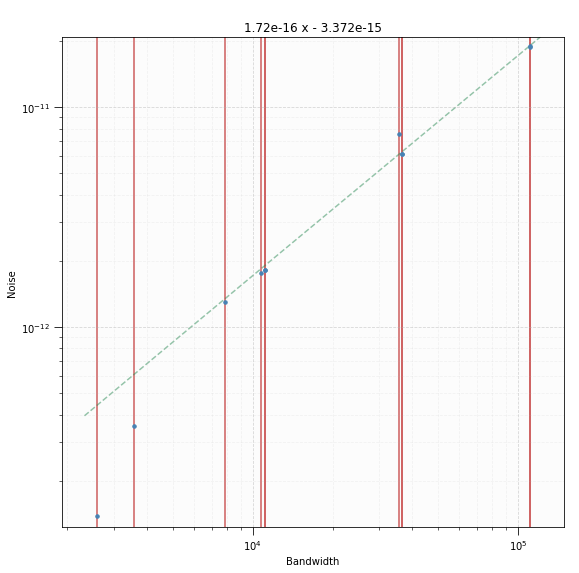

In [47]:
height_ratios = [9]
width_ratios = [9]
wspace = 0
hspace = 0
fig = plt.figure(figsize=(sum(width_ratios) + wspace *
                          (len(width_ratios) - 1),
                          sum(height_ratios) + hspace *
                          (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios),
                       len(width_ratios),
                       height_ratios=height_ratios,
                       width_ratios=width_ratios)
fig.suptitle('', fontsize=20)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(data_johnson_df['df'], data_johnson_df_noise,
            marker='o', s=12, c = 'steelblue')
ax.plot(fit_data_johnson_df_x, fit_data_johnson_df(fit_data_johnson_df_x),
        '--', c='seagreen', alpha = .5, zorder=0)
ax.errorbar(data_johnson_df['df'], data_johnson_df_noise,
            data_johnson_df['df'], data_johnson_df_noise_err, fmt=',',
            c='indianred', label='Error', zorder=0)
ax.update({'title': '{}'.format(fit_data_johnson_df),
            'xlabel': 'Bandwidth',
            'ylabel': 'Noise'})
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_facecolor('whitesmoke')
ax.patch.set_alpha(.25)
ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
ax.set_ylim((min(data_johnson_df_noise)*.9,
             max(data_johnson_df_noise)*1.1))
#ax.set_xlim((min(verdet_right)-.00002, max(verdet_right)*1.1))
plt.show()


$k_{b} = \frac{c}{4TR}$

In [24]:
kb_obs = 1.72e-16/(4.*296.5*10000)
kb_true = 1.38064852e-23
print 'Observed Boltzman Constant = {}'.format(kb_obs)
print 'Real Boltzman Constant = 1.38064852e−23'
print 'Percent Error = {:.2f}%'.format(abs(kb_true-kb_obs)/kb_obs*100.)

Observed Boltzman Constant = 1.4502529511e-23
Real Boltzman Constant = 1.38064852e−23
Percent Error = 4.80%


# Shot Noise

### Noise of amplifier
Monitor: 0.350 mV

Background Noise: .465 V

In [164]:
monitor_noise = 0.350 / 1000
monitor_noise_e = 0.001
background_noise = 0.465
background_noise_e = 0.002
shot_data = np.zeros(13, dtype=[('monitor', float, 1),
                                ('monitor_e', float, 1),
                                ('V_avg', float, 1),
                                ('V_avg_e',   float, 1)])
shot_data['monitor'] = np.array([-68.44, -78.523, -99.60, -41.72, -32.066,
                                 -20.815, -11.190, -50.660, -62.515, -72.740,
                                 -88.860, -105.52, -112.652])  / 1000.0 - monitor_noise
shot_data['monitor_e'] = np.array([.01, .001, .01, .001, .001, .001, .001,
                                   .001, .001, .001, .001, .01, .001]) / 1000.0
shot_data['V_avg'] = np.array([.874, .931, 1.054, 0.716, .6576, .590, .5374,
                               .7654, .8379, .898, .9940, 1.093, 1.1345]) - background_noise
shot_data['V_avg_e'] = np.array([.001, .001, .001, .001, .0001, .001, .0001,
                                 .0001, .0001, .001, .0001, .001, .0001])

shot_data_df = np.zeros(5, dtype=[('corner', float, 1),
                                  ('df', float, 1),
                                  ('V_mon', float, 1),
                                  ('V_sq', float, 1),
                                  ('V_sq_e', float, 1),
                                  ('background', float, 1),
                                  ('G',   float, 1)])

shot_data_df['corner'] = np.array([330, 1000, 3300, 10000, 100000])
shot_data_df['df'] = np.array([355, 1100, 3654, 11096, 114000])
shot_data_df['V_mon'] = np.array([-99.101, -98.843, -98.693, -98.164, -99.60]) / 1000. - monitor_noise
shot_data_df['background'] = np.array([5.9, 24.6, 90.4, 175.4, .465]) / 1000
shot_data_df['V_sq'] = np.array([0.29, 0.476, 0.61, 0.75, 1.054]) - shot_data_df['background']
shot_data_df['V_sq_e'] = np.array([0.03, 0.004, 0.02, 0.002, .001])
shot_data_df['G'] = np.array([10000, 10000, 10000, 8000, 4000])

print shot_data_df['V_sq'] * 10.0 / (100*shot_data_df['G']*10e3)**2 / shot_data_df['df'] / shot_data_df['V_mon']

shot_data_df['df'] = shot_data_df['df']*(100*shot_data_df['G'])**2
shot_data_df['V_sq'] = shot_data_df['V_sq'] - .484

i_dc = np.mean(shot_data_df['V_mon']) / 10e3

fit_shot_data = np.polyfit(shot_data['monitor'], shot_data['V_avg'], 1)
fit_shot_data = np.poly1d(fit_shot_data)
fit_shot_data_x = np.linspace(min(shot_data['monitor'])*1.1, max(shot_data['monitor'])*.9, 10000)

fit_shot_data_df = np.polyfit(shot_data_df['df'], shot_data_df['V_sq'], 1)
fit_shot_data_df = np.poly1d(fit_shot_data_df)
fit_shot_data_df_x = np.linspace(min(shot_data_df['df'])*1.1, max(shot_data_df['df'])*.9, 10000)

[ -8.04699490e-22  -4.13702213e-22  -1.43574335e-22  -8.21336733e-23
  -5.77884885e-23]


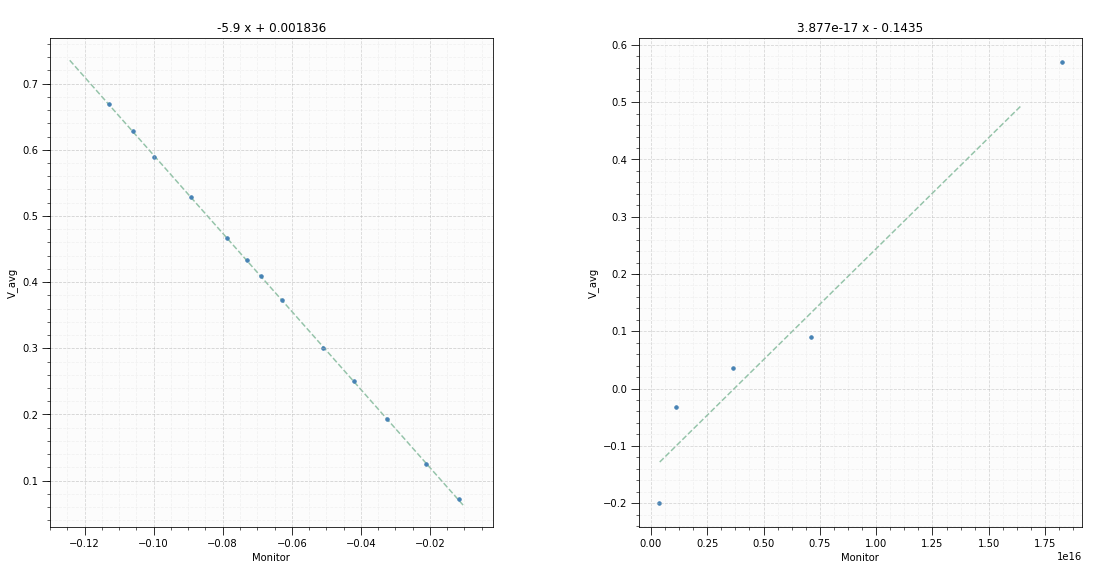

In [165]:
height_ratios = [9]
width_ratios = [9,0.5,9]
wspace = 0
hspace = 0
fig = plt.figure(figsize=(sum(width_ratios) + wspace *
                          (len(width_ratios) - 1),
                          sum(height_ratios) + hspace *
                          (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios),
                       len(width_ratios),
                       height_ratios=height_ratios,
                       width_ratios=width_ratios)
fig.suptitle('', fontsize=20)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(shot_data['monitor'], shot_data['V_avg'], 
            marker='o', s=12, c = 'steelblue')
ax.plot(fit_shot_data_x, fit_shot_data(fit_shot_data_x),
        '--', c='seagreen', alpha = .5, zorder=0)
# ax.errorbar(data_johnson_df['df'], data_johnson_df_noise,
#             data_johnson_df['df'], data_johnson_df_noise_err, fmt=',',
#             c='indianred', label='Error', zorder=0)
ax.update({'title': '{}'.format(fit_shot_data),
            'xlabel': 'Monitor',
            'ylabel': 'V_avg'})
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_facecolor('whitesmoke')
ax.patch.set_alpha(.25)
ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)

ax = fig.add_subplot(gs[0, 2])
ax.scatter(shot_data_df['df'], shot_data_df['V_sq'], 
            marker='o', s=12, c = 'steelblue')
ax.plot(fit_shot_data_df_x, fit_shot_data_df(fit_shot_data_df_x),
        '--', c='seagreen', alpha = .5, zorder=0)
# ax.errorbar(data_johnson_df['df'], data_johnson_df_noise,
#             data_johnson_df['df'], data_johnson_df_noise_err, fmt=',',
#             c='indianred', label='Error', zorder=0)
ax.update({'title': '{}'.format(fit_shot_data_df),
            'xlabel': 'Monitor',
            'ylabel': 'V_avg'})
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_facecolor('whitesmoke')
ax.patch.set_alpha(.25)
ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
# ax.set_ylim((min(data_johnson_df_noise)*.9,
#              max(data_johnson_df_noise)*1.1))
#ax.set_xlim((min(verdet_right)-.00002, max(verdet_right)*1.1))
plt.show()

In [160]:
3.877e-17 * 5.0 / i_dc / (10e3)**2

-1.9535383381269008e-19

$V_{sq} = \frac{-e\Delta fR_{f}(G_{1}G_{2})^{2}}{5}$

In [150]:
e_obs = (5. * -5.9) / (114e3 * 10e3 * (100*4000)**2)
e_true = -1.602e-19
print 'Observed Electron Charge = {}'.format(e_obs)
print 'Real Electron Charge = -1.602e-19'
print 'Percent Error = {:.2f}%'.format(abs(abs(e_true-e_obs)/e_obs*100.))

Observed Electron Charge = -1.6173245614e-19
Real Electron Charge = -1.602e-19
Percent Error = 0.95%


In [161]:
e_df_obs = 3.877e-17 * 5.0 / i_dc / (10e3)**2
e_true = -1.602e-19
print 'Observed Electron Charge = {}'.format(e_df_obs)
print 'Real Electron Charge = -1.602e-19'
print 'Percent Error = {:.2f}%'.format(abs(abs(e_true-e_df_obs)/e_df_obs*100.))

Observed Electron Charge = -1.95353833813e-19
Real Electron Charge = -1.602e-19
Percent Error = 17.99%


### Discussion and Conclusion:
Look what we did!

### References:
Shoutout to the homies